<a href="https://colab.research.google.com/github/Subhradeep10/Amazing-Machine-Learning/blob/main/OIL_and_GAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Oil and Gas 1932-2014.csv")
df

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,10.860860,0.870000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,8.815239,0.670000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,12.715790,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,12.039690,0.970000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,13.383210,1.090000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.420786,17.075768,1.374774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716,ZWE,2010,Zimbabwe,0.0,62.778052,79.495534,0.0,0.0,...,0.0,0.0,0.0,0.0,12571454.0,NaN,1,0.789705,1.085666,1.374774
15517,Zimbabwe,716,ZWE,2011,Zimbabwe,0.0,85.170708,111.255598,0.0,0.0,...,0.0,0.0,0.0,0.0,12754378.0,NaN,1,0.765541,1.052445,1.374774
15518,Zimbabwe,716,ZWE,2012,Zimbabwe,0.0,83.754465,111.669702,0.0,0.0,...,0.0,0.0,0.0,0.0,13724317.0,NaN,1,0.750020,1.031107,1.374774
15519,Zimbabwe,716,ZWE,2013,Zimbabwe,0.0,80.319530,108.658518,0.0,0.0,...,0.0,NaN,NaN,NaN,14149648.0,NaN,1,0.739192,1.016222,1.374774


In [15]:
df.drop(df[df['cty_name'] != "India"].index, inplace= True)
df

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
6391,India,356,IND,1932,India,1.204508e+06,10.860860,0.870000,7.681268e+06,9.678301e+07,...,NaN,NaN,NaN,NaN,3.458000e+08,345800000.0,0,12.599874,17.321973,1.374774
6392,India,356,IND,1933,India,1.194399e+06,8.815239,0.670000,5.865813e+06,7.789837e+07,...,NaN,NaN,NaN,NaN,3.507000e+08,350700000.0,0,13.280064,18.257080,1.374774
6393,India,356,IND,1934,India,2.625680e+05,12.715790,1.000000,1.924623e+06,2.473720e+07,...,NaN,NaN,NaN,NaN,3.556000e+08,355600000.0,0,12.853008,17.669975,1.374774
6394,India,356,IND,1935,India,2.784150e+05,12.039690,0.970000,1.979558e+06,2.481947e+07,...,NaN,NaN,NaN,NaN,3.606000e+08,360600000.0,0,12.537882,17.236748,1.374774
6395,India,356,IND,1936,India,2.702190e+05,13.383210,1.090000,2.158969e+06,2.681609e+07,...,NaN,NaN,NaN,NaN,3.657000e+08,365700000.0,0,12.420786,17.075768,1.374774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6469,India,356,IND,2010,India,3.741474e+07,62.778052,79.495534,2.180165e+10,1.721688e+10,...,-80.154316,-1.535228e+09,-1.253642,-62.378977,1.224614e+09,NaN,1,0.789705,1.085666,1.374774
6470,India,356,IND,2011,India,3.896057e+07,85.170708,111.255598,3.177249e+10,2.432314e+10,...,-108.125863,-1.770100e+09,-1.425785,-85.424412,1.241492e+09,NaN,1,0.765541,1.052445,1.374774
6471,India,356,IND,2012,India,3.869313e+07,83.754465,111.669702,3.167183e+10,2.375449e+10,...,-118.087429,-1.275442e+09,-1.031338,-79.767658,1.236687e+09,NaN,1,0.750020,1.031107,1.374774
6472,India,356,IND,2013,India,3.844936e+07,80.319530,108.658518,3.062365e+10,2.263676e+10,...,-112.809778,NaN,NaN,NaN,1.252140e+09,NaN,1,0.739192,1.016222,1.374774


In [19]:
df['oil_price_2000'].isna().sum()

0

In [20]:
df['oil_price_nom'].isna().sum()

0

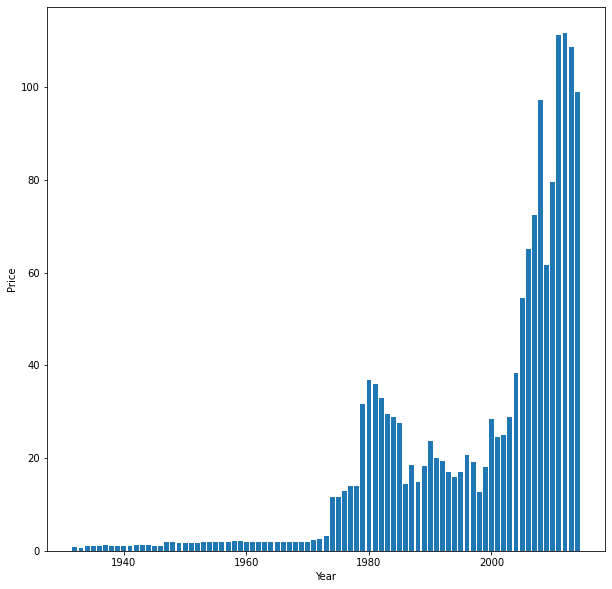

In [21]:
x = df['year']
y = df['oil_price_nom']
plt.figure(figsize=(10, 10))
plt.bar(x,y)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

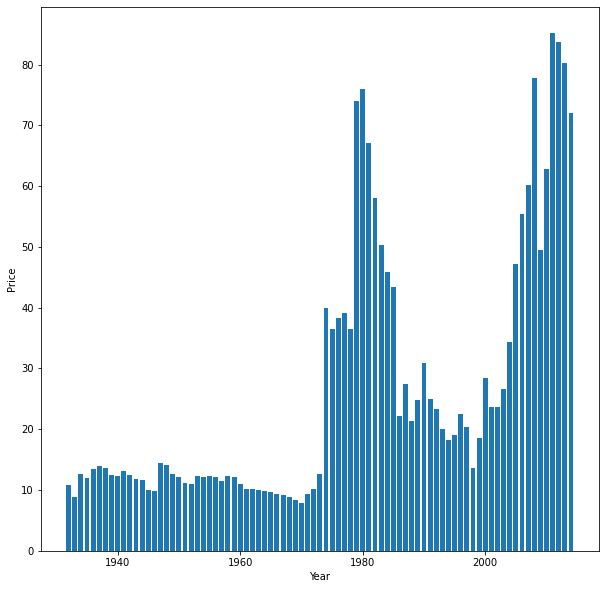

In [22]:
x = df['year']
y = df['oil_price_2000']
plt.figure(figsize=(10, 10))
plt.bar(x,y)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [27]:
X = df[["oil_price_nom" , "oil_price_2000"]]
X

,oil_price_nom,oil_price_2000
6391,0.870000,10.860860
6392,0.670000,8.815239
6393,1.000000,12.715790
6394,0.970000,12.039690
6395,1.090000,13.383210
...,...,...
6469,79.495534,62.778052
6470,111.255598,85.170708
6471,111.669702,83.754465
6472,108.658518,80.319530


In [29]:
Y = df[['year']]
Y


,year
6391,1932
6392,1933
6393,1934
6394,1935
6395,1936
...,...
6469,2010
6470,2011
6471,2012
6472,2013


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [82]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [83]:
res = model.score(X_train, Y_train)
print(res*100, "%")

55.80225396513639 %


In [84]:
res = model.score(X_test, Y_test)
print(res*100, "%")

59.126562615183964 %
